# DATA PREPARATION PHASE :
##  DATA UNDERSTANDING AND PREPROCESSING

### Module mporting

In [1]:
import pandas as pd
import numpy as np
from utils.essential import *
from utils.preparation import *
from utils.preparation_visualization import *

# DATA UNDERSTANDING PART 1

## Data Loading

In [2]:
# Google Drive access - (Uncoment if required)
#drive.mount('/content/drive')

path_df_original = '../data/raw/marketing_campaign_data.csv' # - (Ensure path is correct)
#Original Dataframe definition
df_original = pd.read_csv(path_df_original, low_memory=False)

Dataset columns:
- Related to campaigns
* `AcceptedCmp1` - Indicates whether the user accepted the offer in the 1st campaign (1 for acceptance, 0 for non-acceptance).
* `AcceptedCmp2` - Indicates whether the user accepted the offer in the 2nd campaign (1 for acceptance, 0 for non-acceptance).
* `AcceptedCmp3` - Indicates whether the user accepted the offer in the 3rd campaign (1 for acceptance, 0 for non-acceptance).
* `AcceptedCmp4` - Indicates whether the user accepted the offer in the 4th campaign (1 for acceptance, 0 for non-acceptance).
* `AcceptedCmp5` - Indicates whether the user accepted the offer in the 5th campaign (1 for acceptance, 0 for non-acceptance).
* `Response` (target) - Indicates whether the user accepted the offer in the last campaign (1 for acceptance, 0 for non-acceptance).
* `Complain` - Indicates whether the user has raised a complaint (1 for yes, 0 for no).

- Related to user

* ID - Id of user
* Year_Birth - year of birth of user
* Education - user’s level of education
* Marital_status - user’s marital status
* Kidhome - number of kids
* Teenhome - number of teenagers
* Income - user’s yearly income
* DtCustomer - date of user’s rel with company
* Recency - number of days since the user last purchased

Amout of purchases per Product Type

* MntCoke, MntFishProducts, MntMeatProducts, MntFruits, etc

Number of Purchases per Type
* NumDealsPurchases, NumCatalogPurchases, NumStorePurchases, NumWebPurchases, NumWebVisitsMonth

- Z_CostContact = 3 (Indicates the cost to contact a user)
- Z_Revenue = 11 is the revenue after user accepts a campaign

## Initial data quality assesment

In [3]:
# Inspection of the first entries of the dataset
df_original.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
total_entries = df_original.shape[0]
total_columns = df_original.shape[1]
# Count number of columns
print('The number of columns in the original dataset is', total_columns)
# Count number of entres
print('The number of rows in the original dataset is', total_entries)

The number of columns in the original dataset is 30
The number of rows in the original dataset is 2240


In [5]:
duplicates = df_original.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


There are no duplicated rows, each row represents a user.

In [6]:
missing_values = df_original.isnull().sum()
total_values = df_original.size
total_missing = missing_values.sum()
percentage_missing_of_total = (total_missing / total_values) * 100

print("Number of missing values:", total_missing)
print(f"Percentage of missing values relative to total values: {percentage_missing_of_total}%")

Number of missing values: 24
Percentage of missing values relative to total values: 0.03571428571428571%


### Data Typing Quality Inspection

In [7]:
original_cat_binary, original_cat_other, original_temporal, original_numerical, original_fully_null, original_constant = type_columns(df_original)
original_categorical = join_column_lists(original_cat_binary, original_cat_other)
df_original_cat = df_original[original_categorical]
df_original_num = df_original[original_numerical]

In [8]:
table_title = ["Features by Data Type"]
column_titles = ["Fully Null", "Constant","Categorical: Binary", "Categorical: Other", "Temporal", "Numerical"]
print_table(table_title, column_titles,  original_fully_null, original_constant, original_cat_binary, original_cat_other, original_temporal, original_numerical)

| ['Features by Data Type']   |               |                     |                    |          |                     |
|:----------------------------|:--------------|:--------------------|:-------------------|:---------|:--------------------|
| Fully Null                  | Constant      | Categorical: Binary | Categorical: Other | Temporal | Numerical           |
|                             |               |                     |                    |          |                     |
|                             | Z_CostContact | AcceptedCmp1        | Dt_Customer        |          | ID                  |
|                             | Z_Revenue     | AcceptedCmp2        | Education          |          | Income              |
|                             |               | AcceptedCmp3        | Marital_Status     |          | Kidhome             |
|                             |               | AcceptedCmp4        |                    |          | MntCoke             |
|       

- Most of the columns are numerical and binary categorical.
- There are no fully null columns
- constant columns must be removed.
- There is an evident mistyping.

In [9]:
unnecessary_types = ['Z_CostContact','Z_Revenue']

#### Mistyping check

Inspecting a sample of a full row, the values and the data type of those values to see the mistyping clearly.

In [10]:
original_vt_valid_row = get_valid_row(df_original)
original_vt_cat = get_data_type_by_row(df_original, original_vt_valid_row, original_categorical)
original_vt_temp = get_data_type_by_row(df_original, original_vt_valid_row, original_temporal)
original_vt_num = get_data_type_by_row(df_original, original_vt_valid_row, original_numerical)

In [11]:
table_title = ['Sample of a complete row']
column_titles = ['Categorical', 'Temporal', 'Numerical']
print_table(table_title, column_titles, original_vt_cat, original_vt_temp, original_vt_num )

| ['Sample of a complete row']     |          |                                 |
|:---------------------------------|:---------|:--------------------------------|
| Categorical                      | Temporal | Numerical                       |
|                                  |          |                                 |
| AcceptedCmp1: 0 (int64)          |          | ID: 5524 (int64)                |
| AcceptedCmp2: 0 (int64)          |          | Income: 58138000.0 (float64)    |
| AcceptedCmp3: 0 (int64)          |          | Kidhome: 0 (int64)              |
| AcceptedCmp4: 0 (int64)          |          | MntCoke: 635000 (int64)         |
| AcceptedCmp5: 0 (int64)          |          | MntFishProducts: 172000 (int64) |
| Complain: 0 (int64)              |          | MntFruits: 88000 (int64)        |
| Response: 1 (int64)              |          | MntGoldProds: 88000 (int64)     |
| Dt_Customer: 04-09-2012 (object) |          | MntMeatProducts: 546000 (int64) |
| Education: S1 

- Categorical
- Dt_Customer should be data typed as a date, a temporal feature.
- Temporal
- There is no temporal data because those features are being typed as a string. This will be corrected during Data Cleansing.

## Basic Data Quality Assessment

There can be features that have a high-cardinality, high missing values (70% or more) or features that are irrelevant.

In [12]:
unnecessary_categorical = []
unnecessary_numerical = []

#### Categorical Data

##### High Cardinality Check

In [13]:
# High Cardinality Check
total_rows = len(df_original)
cardinality_threshold = 0.01  # You can adjust this threshold as needed
high_cardinality = []
for col in df_original_cat.columns:
    unique_values = df_original_cat[col].nunique()
    value_counts = df_original_cat[col].value_counts()
    if len(value_counts) / total_rows > cardinality_threshold:
        high_cardinality.append(col)
        print(f"High Cardinality Detected in {col} | {unique_values} different categories")

High Cardinality Detected in Dt_Customer | 663 different categories


That is okay gven that it is a temporal feature.

##### Class Dominance Check

In [14]:
import pandas as pd

def find_columns_with_dominant_class(df, threshold=0.8):
    dominant_columns = []

    for column in df.columns:
        value_counts = df[column].value_counts(normalize=True)
        top_class = value_counts.index[0]
        top_class_percentage = value_counts.iloc[0]

        if top_class_percentage >= threshold:
            dominant_columns.append((column, top_class, top_class_percentage))

    return dominant_columns


result = find_columns_with_dominant_class(df_original_cat, threshold=0.6)
for column, top_class, top_class_percentage in result:
    print(f"Column '{column}' has a dominant class '{top_class}' with {top_class_percentage*100:.2f}% of the values.")


Column 'AcceptedCmp1' has a dominant class '0' with 93.57% of the values.
Column 'AcceptedCmp2' has a dominant class '0' with 98.66% of the values.
Column 'AcceptedCmp3' has a dominant class '0' with 92.72% of the values.
Column 'AcceptedCmp4' has a dominant class '0' with 92.54% of the values.
Column 'AcceptedCmp5' has a dominant class '0' with 92.72% of the values.
Column 'Complain' has a dominant class '0' with 99.06% of the values.
Column 'Response' has a dominant class '0' with 85.09% of the values.


All binary categoricals have a dominant class of 0.

Numderical Data

In [15]:
df_original_num.columns

Index(['ID', 'Income', 'Kidhome', 'MntCoke', 'MntFishProducts', 'MntFruits',
       'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Unnamed: 0', 'Year_Birth'],
      dtype='object')

As seen before, each user is represented by a numerical Id, in the column `Unnamed:0`, because of that this numerical column is unnecessary.

In [16]:
df_original['Unnamed: 0'].value_counts()

Unnamed: 0
0       1
1496    1
1490    1
1491    1
1492    1
       ..
740     1
739     1
738     1
737     1
2239    1
Name: count, Length: 2240, dtype: int64

In [17]:
df_original['ID'].value_counts()

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: count, Length: 2240, dtype: int64

In [18]:
unnecessary_numerical = ['Unnamed: 0', 'ID']

#### Missing Values by Data Type

##### Missing values check (Categorical)

In [19]:
# Calculate the missing percentages and get the data lists
potential_missing_cat = exclude_elements(original_categorical, unnecessary_categorical)
df_potential_missing_cat = df_original[potential_missing_cat]
cat_low_col, cat_low_val, cat_high_col, cat_high_val = calculate_missing_percentages(df_potential_missing_cat, 60)
table_title = ["Rest of Categorical Columns by Missing Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-69%', '', "High % of Missing Values", "70-99%"]
print_table(table_title, column_titles, cat_low_col, cat_low_val, '', cat_high_col, cat_high_val)


| ['Rest of Categorical Columns by Missing Data %']   |       |    |                          |        |
|:----------------------------------------------------|:------|:---|:-------------------------|:-------|
| Low-Moderate % of Missing Values                    | 0-69% |    | High % of Missing Values | 70-99% |
|                                                     |       |    |                          |        |
| AcceptedCmp1                                        | 0.0   |    |                          |        |
| AcceptedCmp2                                        | 0.0   |    |                          |        |
| AcceptedCmp3                                        | 0.0   |    |                          |        |
| AcceptedCmp4                                        | 0.0   |    |                          |        |
| AcceptedCmp5                                        | 0.0   |    |                          |        |
| Complain                                            |

From the categorical features that are not unnnecesary there are not any features with missing values.

##### Missing values check (Numerical)

In [20]:
potential_missing_num = exclude_elements(original_numerical, unnecessary_numerical)
df_potential_missing_num = df_original[potential_missing_num]
num_low_col, num_low_val, num_high_col, num_high_val = calculate_missing_percentages(df_potential_missing_num, 70)
table_title = ["Numerical by  Columns Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-69%', '', "High % of Missing Values", "70% - 99%"]
print_table(table_title, column_titles, num_low_col, num_low_val, '', num_high_col, num_high_val)

| ['Numerical by  Columns Data %']   |       |    |                          |           |
|:-----------------------------------|:------|:---|:-------------------------|:----------|
| Low-Moderate % of Missing Values   | 0-69% |    | High % of Missing Values | 70% - 99% |
|                                    |       |    |                          |           |
| Income                             | 1.0   |    |                          |           |
| Kidhome                            | 0.0   |    |                          |           |
| MntCoke                            | 0.0   |    |                          |           |
| MntFishProducts                    | 0.0   |    |                          |           |
| MntFruits                          | 0.0   |    |                          |           |
| MntGoldProds                       | 0.0   |    |                          |           |
| MntMeatProducts                    | 0.0   |    |                          |           |

There are missing values in the following columns, which will be be treated during Data Cleansing.

In [21]:
missing_numerical = []
low_part_null_num = columns_within_threshold(num_low_col, num_low_val, 0, 70)
missing_numerical = join_column_lists(missing_numerical, low_part_null_num)
print(missing_numerical)

['Income']


### Further steps

- Conversion rate feature.
- Categorical (Other) categories will be prepared for eda.
- Segmentation by Age, Income.
- Data typing
- TASK 2: During Data Preprocesing: 
- Missing data and will be treated.

# DATA PREPROCESSING PART 1

To proceed it is better to work on a copy.
  

In [22]:
df = df_original.copy()

# Data Typing

In [23]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [24]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [25]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

## Feature Engineering

In [26]:
latest_date = df['Dt_Customer'].max()

print("Latest Date in 'Dt_Customer' column:", latest_date)

Latest Date in 'Dt_Customer' column: 2014-06-29 00:00:00


based on that date the relative year is 2014

In [27]:
df['Customer_Year'] = df['Dt_Customer'].dt.year

In [28]:
# Total Purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Conversion Rate
df['Conversion_Rate'] = np.where(df['NumWebVisitsMonth'] != 0,
                                 np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2),
                                 0)
df['Conversion_Rate'].fillna(0, inplace=True)

# Total Accepted Campaigns
df['Total_AcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
# Age
df['Age'] = 2023 - df['Year_Birth']
# Create a new column with default value
df['Age_Group'] = 'Unknown'
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior Adult', 'Elderly']
# Use loc to assign values based on conditions
df.loc[(df['Age'] >= 0) & (df['Age'] < 18), 'Age_Group'] = 'Child'
df.loc[(df['Age'] >= 18) & (df['Age'] < 25), 'Age_Group'] = 'Young Adult'
df.loc[(df['Age'] >= 25) & (df['Age'] < 35), 'Age_Group'] = 'Adult'
df.loc[(df['Age'] >= 35) & (df['Age'] < 45), 'Age_Group'] = 'Middle-Aged'
df.loc[(df['Age'] >= 45) & (df['Age'] < 55), 'Age_Group'] = 'Senior Adult'
df.loc[(df['Age'] >= 55), 'Age_Group'] = 'Elderly'

# Total Spent
df['Total_Spent'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
# Total Kids
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']
# Parents
df['Parents'] = np.where(df['Total_Kids'] > 0, 1, 0)

Child: 0-17 years
Young Adult: 18-24 years
Adult: 25-34 years
Middle-Aged: 35-44 years
Senior Adult: 45-54 years
Elderly: 55 years and above

In [29]:
df['Education'].unique()


array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [30]:
education_mapping = {
    'S1': 'Bachelors',
    'S2': 'Masters',
    'S3': 'Doctorate',
    'SMA': 'High School',
    'D3': 'Bachelors'
}

df['Education'] = df['Education'].map(education_mapping)

In [31]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [32]:
# Rename the 'Marital_Status' column to 'In_Relationship'
df.rename(columns={'Marital_Status': 'In_Relationship'}, inplace=True)

# Define a mapping for the replacement
marital_status_mapping = {
    'Lajang': 0,
    'Bertunangan': 1,
    'Menikah': 1,
    'Cerai': 0,
    'Janda': 0,
    'Duda': 0
}

# Map the values using map
df['In_Relationship'] = df['In_Relationship'].map(marital_status_mapping)

In [33]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define bin edges based on IQR
bin_edges = [-float('inf'), Q1, Q1 + IQR, float('inf')]
bin_labels = ['Low', 'Medium', 'High']

df['Income_Level'] = pd.cut(df['Income'], bins=bin_edges, labels=bin_labels)

In [34]:
new_columns = ['Customer_Year','Age', 'Age_Group', 'Total_Purchases', 'Conversion_Rate', 'Total_AcceptedCmp', 'Total_Spent', 'Total_Kids', 'Parents', 'Education', 'In_Relationship', 'Income_Level']
df[new_columns]

,Customer_Year,Age,Age_Group,Total_Purchases,Conversion_Rate,Total_AcceptedCmp,Total_Spent,Total_Kids,Parents,Education,In_Relationship,Income_Level
0,2012,66,Elderly,25,3.57,0,1617000,0,0,Bachelors,0,Medium
1,2014,69,Elderly,6,1.20,0,27000,2,1,Bachelors,0,Medium
2,2013,58,Elderly,21,5.25,0,776000,0,0,Bachelors,1,High
3,2014,39,Middle-Aged,8,1.33,0,53000,1,1,Bachelors,1,Low
4,2014,42,Middle-Aged,19,3.80,0,422000,1,1,Doctorate,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2013,56,Elderly,18,3.60,0,1341000,1,1,Bachelors,1,Medium
2236,2014,77,Elderly,22,3.14,1,444000,3,1,Doctorate,1,Medium
2237,2014,42,Middle-Aged,19,3.17,1,1241000,0,0,Bachelors,0,Medium
2238,2014,67,Elderly,23,7.67,0,843000,1,1,Masters,1,High


# DATA UNDERSTANDING PART 2

## Exploratory Data Analysis

As per the requirements, the focus of this phase will be on Income, Spending And Age

In [35]:
cat_binary, cat_other, temporal, numerical = type_columns(df,True)
categorical = join_column_lists(cat_binary, cat_other)

### Statistical Summary 

In [36]:
df[categorical].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,In_Relationship,Parents,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.644643,0.715179,0.149107
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.478728,0.451430,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df[numerical].describe()

,Age,Conversion_Rate,Customer_Year,ID,Income,Kidhome,MntCoke,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Total_AcceptedCmp,Total_Kids,Total_Purchases,Total_Spent,Unnamed: 0,Year_Birth
count,2240.000000,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,54.194196,4.395170,2013.028125,5592.159821,5.224725e+07,0.444196,3.039357e+05,37525.446429,26302.232143,44021.875000,1.669500e+05,27062.946429,2.662054,2.325000,5.790179,4.084821,5.316518,49.109375,0.506250,0.297768,0.950446,14.862054,6.057982e+05,1119.500000,1968.805804
std,11.984069,4.913677,0.684554,3246.662198,2.517308e+07,0.538398,3.365974e+05,54628.979403,39773.433765,52167.438915,2.257154e+05,41280.498488,2.923101,1.932238,3.250958,2.778714,2.426645,28.962453,0.544538,0.678381,0.751803,7.677173,6.022493e+05,646.776623,11.984069
min,27.000000,0.000000,2012.000000,0.000000,1.730000e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03,0.000000,1893.000000
25%,46.000000,1.220000,2013.000000,2828.250000,3.530300e+07,0.000000,2.375000e+04,3000.000000,1000.000000,9000.000000,1.600000e+04,1000.000000,0.000000,1.000000,3.000000,2.000000,3.000000,24.000000,0.000000,0.000000,0.000000,8.000000,6.875000e+04,559.750000,1959.000000
50%,53.000000,2.600000,2013.000000,5458.500000,5.138150e+07,0.000000,1.735000e+05,12000.000000,8000.000000,24000.000000,6.700000e+04,8000.000000,2.000000,2.000000,5.000000,4.000000,6.000000,49.000000,0.000000,0.000000,1.000000,15.000000,3.960000e+05,1119.500000,1970.000000
75%,64.000000,5.347500,2013.000000,8427.750000,6.852200e+07,1.000000,5.042500e+05,50000.000000,33000.000000,56000.000000,2.320000e+05,33000.000000,4.000000,3.000000,8.000000,6.000000,7.000000,74.000000,1.000000,0.000000,1.000000,21.000000,1.045500e+06,1679.250000,1977.000000
max,130.000000,43.000000,2014.000000,11191.000000,6.666660e+08,2.000000,1.493000e+06,259000.000000,199000.000000,362000.000000,1.725000e+06,263000.000000,28.000000,15.000000,13.000000,27.000000,20.000000,99.000000,2.000000,4.000000,3.000000,44.000000,2.525000e+06,2239.000000,1996.000000


## Conversion Rate Analysis Based On Income, Spending And Age

### Univariate Analysis

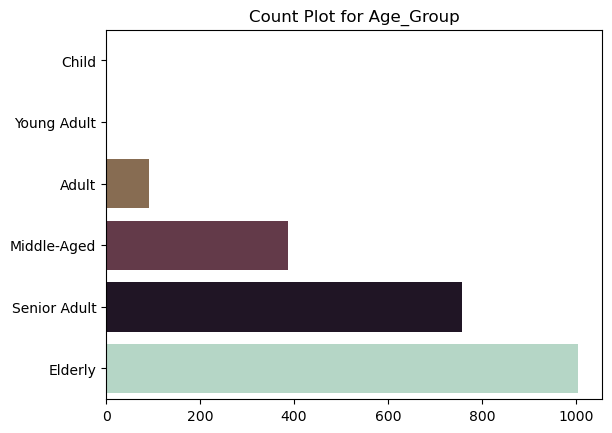

In [39]:
custom_order = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior Adult', 'Elderly']

custom_countplot(df, y='Age_Group', order=custom_order)
plt.show()

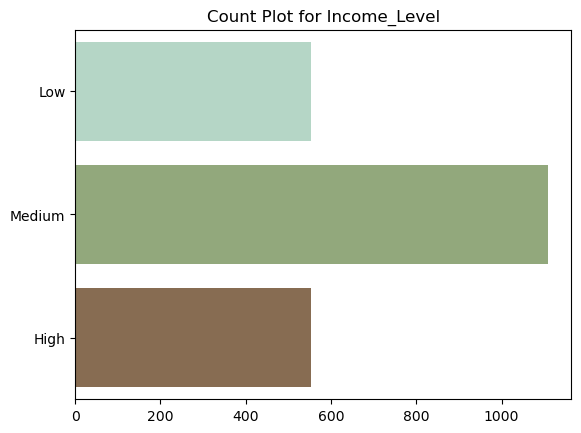

In [40]:
custom_countplot(df, y='Income_Level')
plt.show() 

Numerical features

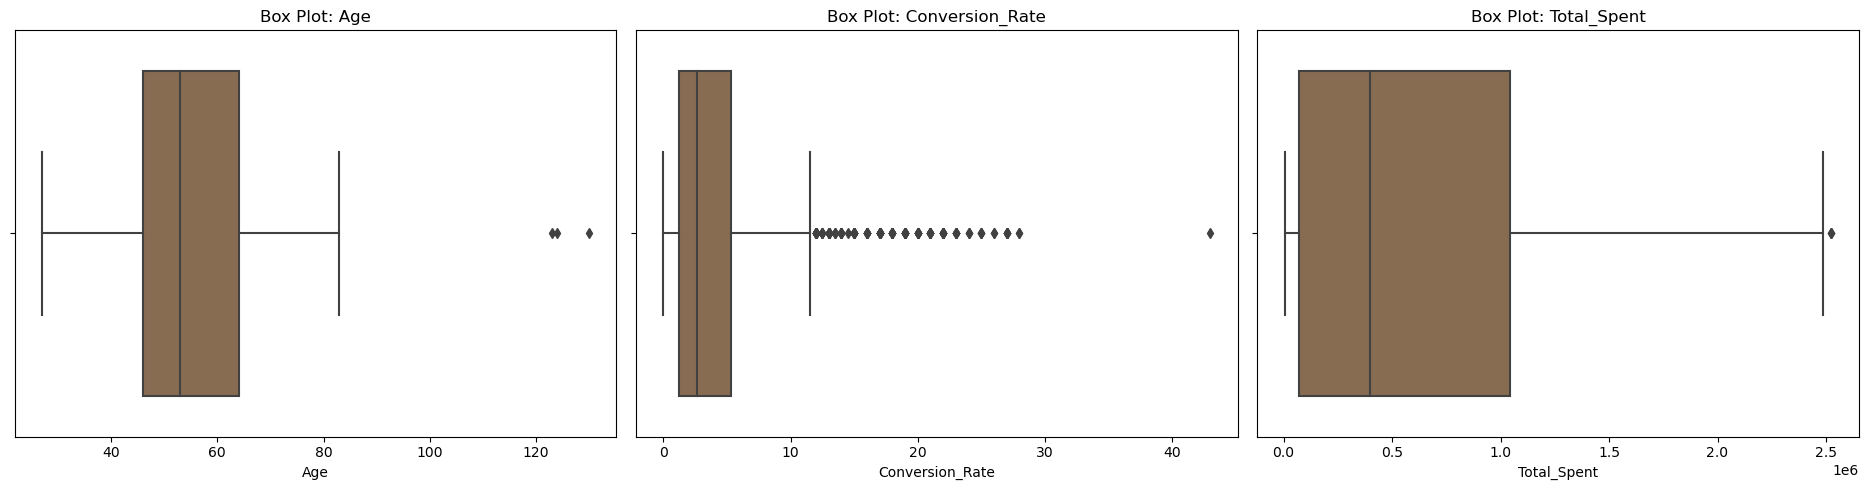

In [41]:
cols_to_plot = ['Age', 'Conversion_Rate', 'Total_Spent']
custom_function = custom_boxplot

withingrid_function_per_cols(df, cols_to_plot, custom_function, figsize=(25, 5))

(0.0, 3000000.0)

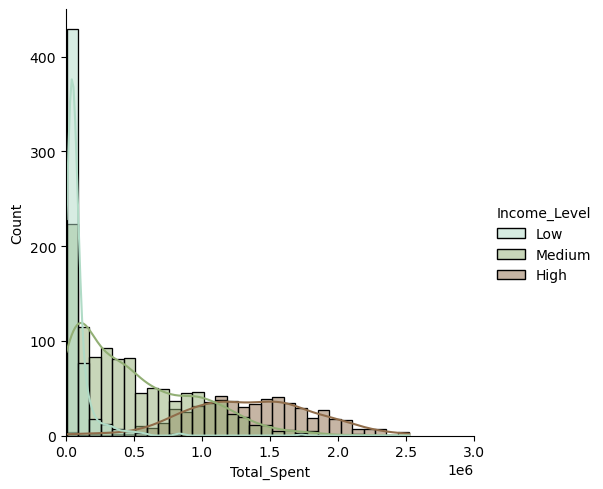

In [82]:
custom_displot(df, x="Total_Spent", hue="Income_Level", title="Distribution of Total Spending by Income Level", xlabel="Total Spending", ylabel="Count")
plt.xlim(0, 3000000)

## Bivariate Analysis

(10.0, 95.0)

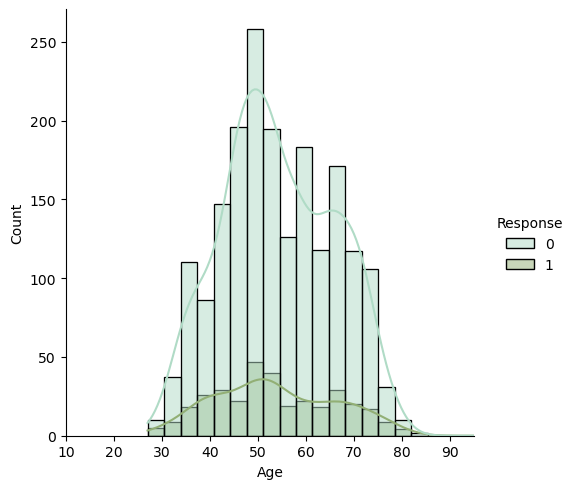

In [70]:
custom_displot(df, 'Age', hue='Response')
plt.xlim(10, 95)

(15.0, 95.0)

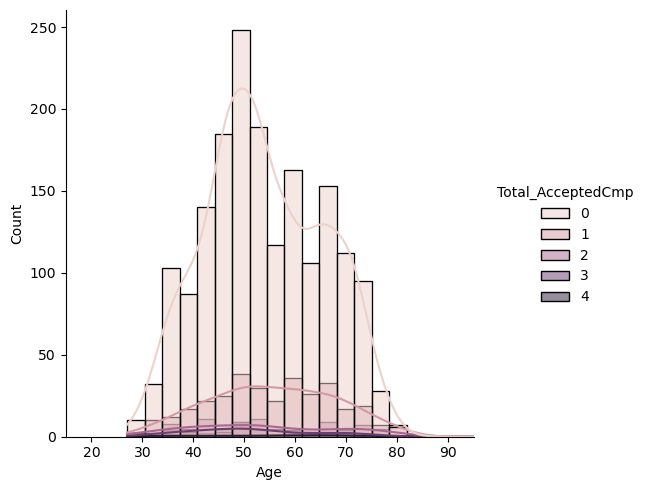

In [73]:
custom_displot(df, 'Age', hue='Total_AcceptedCmp')
plt.xlim(15, 95)

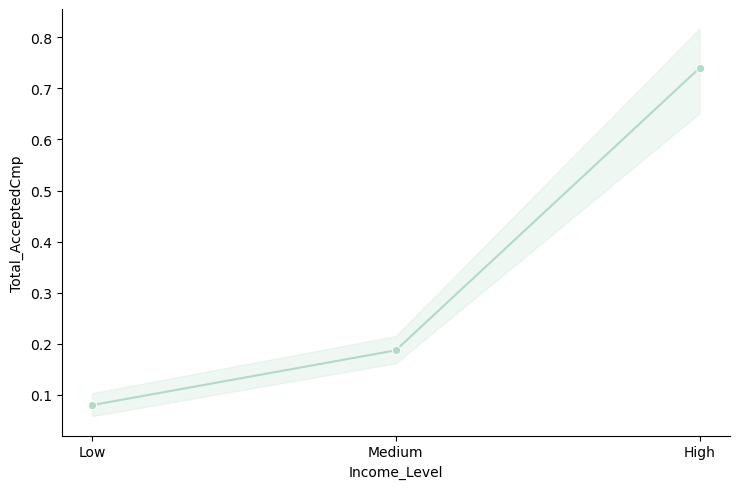

In [46]:
custom_relplot(df, x='Income_Level', y='Total_AcceptedCmp', kind='line', marker='o', direction='col')

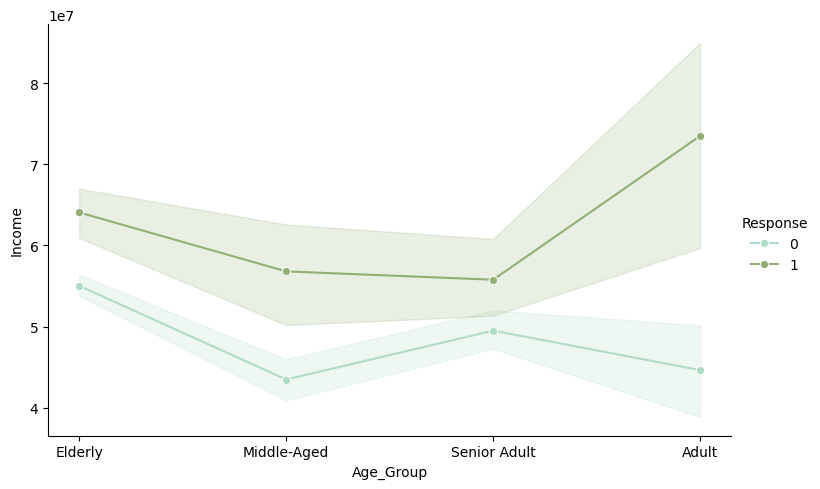

In [47]:
custom_relplot(df, x='Age_Group', y='Income', hue='Response', kind='line', marker='o', direction='row')

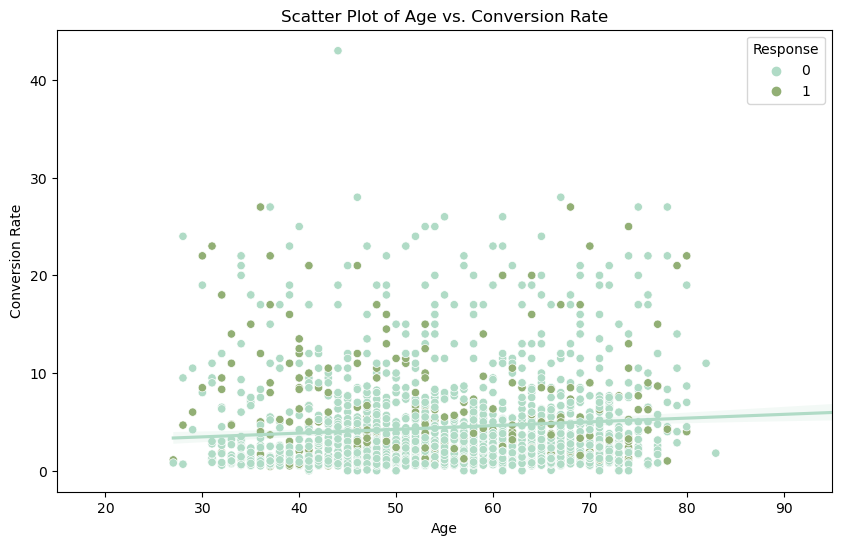

In [84]:
plt.figure(figsize=(10, 6))
custom_scatterplot(df, x_col='Age', y_col='Conversion_Rate', hue='Response', title='Scatter Plot of Age vs. Conversion Rate', xlabel='Age', ylabel='Conversion Rate')
plt.xlim(15, 95)
plt.show()

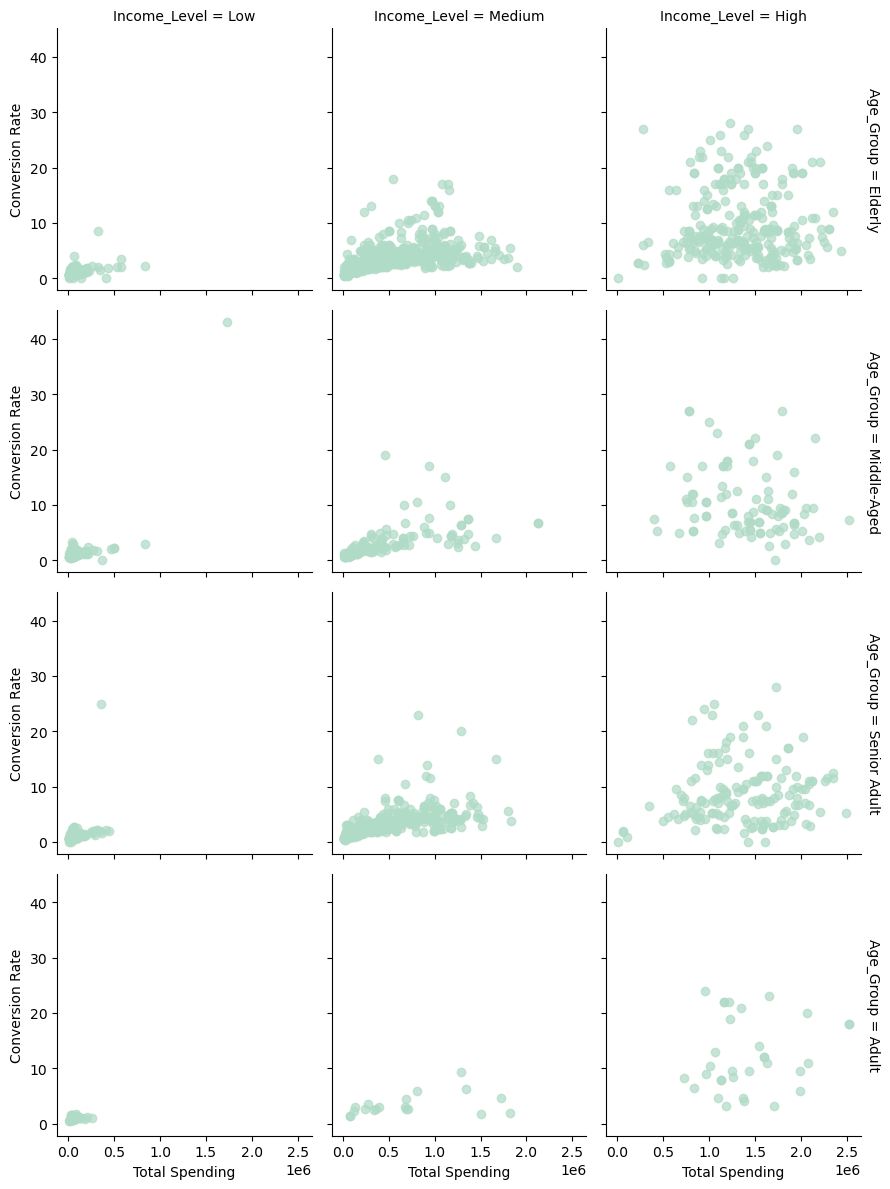

In [53]:
g = sns.FacetGrid(df, col="Income_Level", row="Age_Group", margin_titles=True)
g.map(plt.scatter, "Total_Spent", "Conversion_Rate", alpha=.7)
g.set_axis_labels("Total Spending", "Conversion Rate")

# Show the plot
plt.show()

# Multivariate Analysis

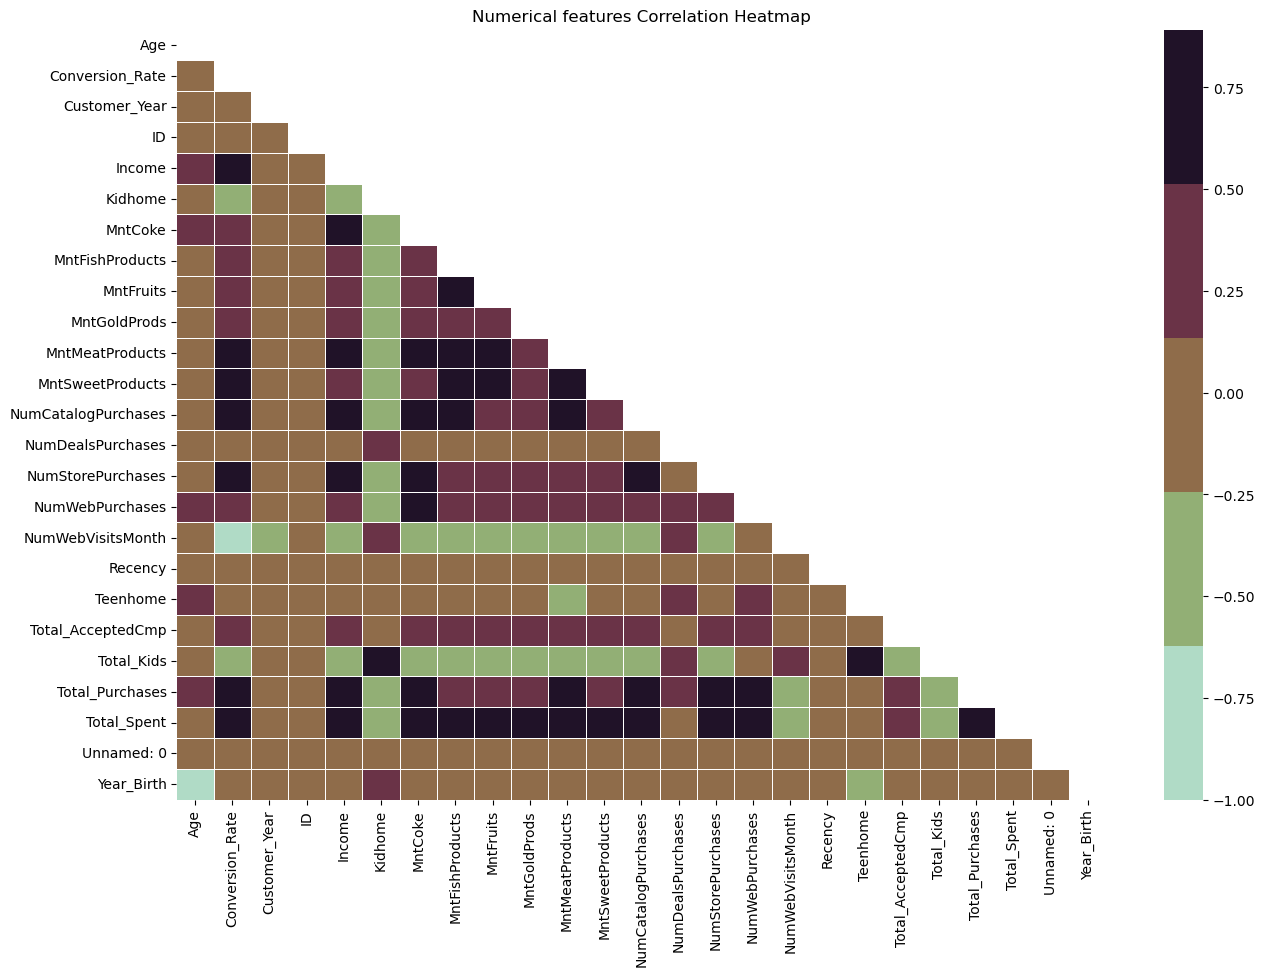

In [49]:
plt.figure(figsize=(15, 10))
ax = plt.gca()
corr_matrix = custom_heatmap(df[numerical], ax)
plt.title("Numerical features Correlation Heatmap")
plt.show()

In [50]:
print("Pairs of features with high correlation between them:")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}")
features_to_drop = set()
for pair in high_corr_pairs:
    features_to_drop.update(pair)
high_corr_features = list(features_to_drop)
print("-"*75)

Pairs of features with high correlation between them:
Total_Purchases and NumStorePurchases
Total_Spent and MntCoke
Total_Spent and MntMeatProducts
Year_Birth and Age
---------------------------------------------------------------------------


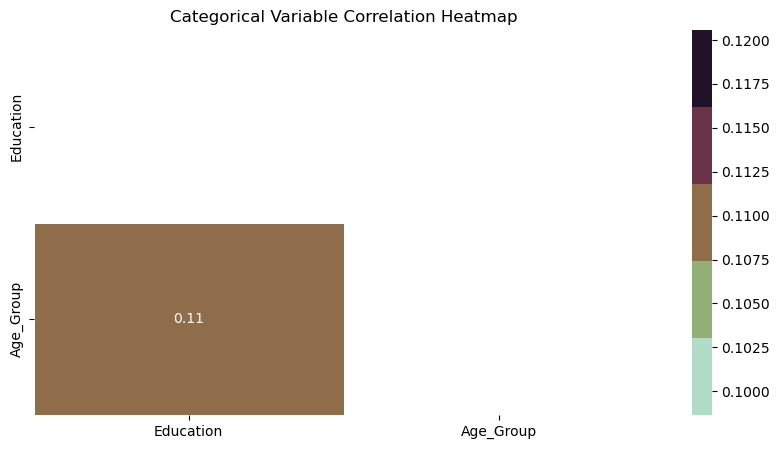

In [51]:
# Select categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=categorical_variables, columns=categorical_variables)

# Calculate Cramér's V for each pair of categorical variables
for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            correlation = cramers_v(df, var1, var2)
            correlation_matrix.at[var1, var2] = correlation

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Create a heatmap for the categorical variable correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap=palette, annot=True, linewidth=.5, mask=mask)
plt.title("Categorical Variable Correlation Heatmap")
plt.show()

Columns that have been used to create new features and unncessary columns can be removed.

# NEXT: DATA PREPARATION PHASE

In [ ]:
# Save the improved DataFrame to a CSV file
path_df_improved = '../data/1-improved/marketing_campaign_data.csv' # - (Ensure path is correct)
df.to_csv(path_df_improved, index=False)

- There is no duplicated data so no treatment is necessary.